<a href="https://colab.research.google.com/github/MALEKA-SKHUMBUSO/Enhancing-Plant-Disease-Classification-Using-Transfer-Learning-and-Hyper-parameter-Optimization/blob/main/Plant_InceptionV3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import time
import copy
import numpy as np
import pandas as pd
from PIL import Image
import torch,torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets,models,transforms
import torch.optim as optim

from torchsummary import summary
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from torch.nn import Parameter

In [ ]:
import warnings
warnings.filterwarnings('ignore')

data_dir_list = os.listdir("C:/Users/Skhum/Downloads/PlantVillage/PlantVillage")
print(data_dir_list)
path, dirs, files = next(os.walk("C:/Users/Skhum/Downloads/PlantVillage/PlantVillage"))
file_count = len(files)

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus']


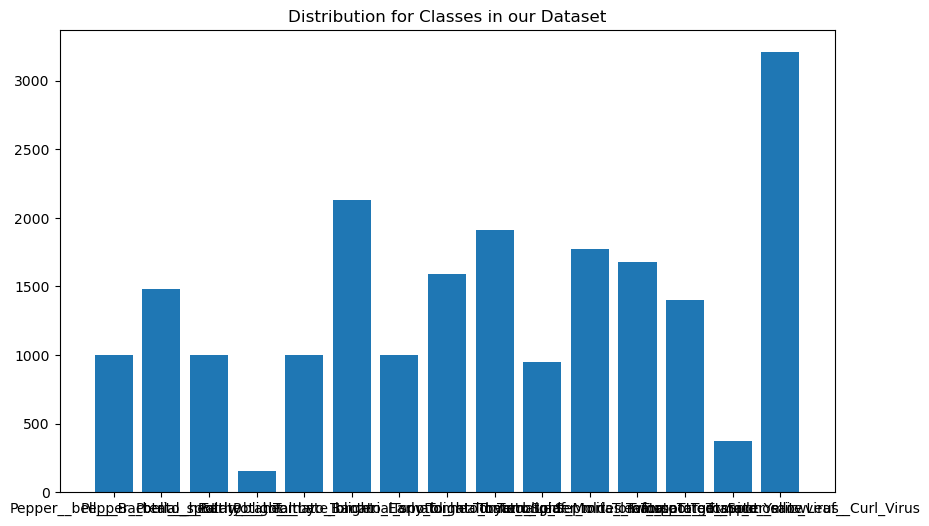

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir("C:/Users/Skhum/Downloads/PlantVillage/PlantVillage/"+i+"/"))
    nimgs[i]=nimages
plt.figure(figsize=(10, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution for Classes in our Dataset')
plt.show()

In [ ]:
for i in ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus']:
    print('Plant Data {} images are: '.format(i)+str(len(os.listdir("C:/Users/Skhum/Downloads/PlantVillage/PlantVillage/"+i+"/"))))

Plant Data Pepper__bell___Bacterial_spot images are: 997
Plant Data Pepper__bell___healthy images are: 1478
Plant Data Potato___Early_blight images are: 1000
Plant Data Potato___healthy images are: 152
Plant Data Potato___Late_blight images are: 1000
Plant Data Tomato_Bacterial_spot images are: 2127
Plant Data Tomato_Early_blight images are: 1000
Plant Data Tomato_healthy images are: 1591
Plant Data Tomato_Late_blight images are: 1909
Plant Data Tomato_Leaf_Mold images are: 952
Plant Data Tomato_Septoria_leaf_spot images are: 1771
Plant Data Tomato_Spider_mites_Two_spotted_spider_mite images are: 1676
Plant Data Tomato__Target_Spot images are: 1404
Plant Data Tomato__Tomato_mosaic_virus images are: 373
Plant Data Tomato__Tomato_YellowLeaf__Curl_Virus images are: 3209


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib
import os
import random


image_folder = ['Potato___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Tomato_Early_blight', 'Tomato_Leaf_Mold', 'Tomato_healthy']
nimgs = {}

num_images_per_class = 150

for i in image_folder:
    class_folder = "C:/Users/Skhum/Downloads/PlantVillage/PlantVillage/" + i + "/"
    all_images = os.listdir(class_folder)

    selected_images = random.sample(all_images, num_images_per_class)
    nimages = len(selected_images)

    nimgs[i] = nimages

plt.figure(figsize=(15, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of randomly selected images for each class')
plt.show()

In [ ]:
import shutil
import os
import random

target_directory = "C:/Users/Skhum/OneDrive - Sol Plaatje University/Desktop/Balanced Data"

for class_name in image_folder:
    class_folder = "C:/Users/Skhum/Downloads/PlantVillage/PlantVillage/" + class_name + "/"
    all_images = os.listdir(class_folder)

    selected_images = random.sample(all_images, num_images_per_class)

    class_target_directory = os.path.join(target_directory, class_name)
    os.makedirs(class_target_directory, exist_ok=True)

    for image_file in selected_images:
        source_path = os.path.join(class_folder, image_file)
        target_path = os.path.join(class_target_directory, image_file)
        shutil.copy(source_path, target_path)

In [ ]:
original_dataset_dir = "C:/Users/Skhum/OneDrive - Sol Plaatje University/Desktop/Balanced Data"
base_dir = "C:/Users/Skhum/OneDrive - Sol Plaatje University/Desktop/New folder"
os.mkdir(base_dir)

In [ ]:
#create 3 folders(train, validation and test)
#We selected 6 plants classes,3 dieses and 3 healthy

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

train_H1_dir = os.path.join(train_dir, 'Potato___healthy')
os.mkdir(train_H1_dir)

train_D1_dir = os.path.join(train_dir, 'Potato___Early_blight')
os.mkdir(train_D1_dir)

train_D2_dir = os.path.join(train_dir, 'Potato___Late_blight')
os.mkdir(train_D2_dir)

train_D3_dir = os.path.join(train_dir, 'Tomato_Early_blight')
os.mkdir(train_D3_dir)

train_D4_dir = os.path.join(train_dir, 'Tomato_Leaf_Mold')
os.mkdir(train_D4_dir)

train_H2_dir = os.path.join(train_dir, 'Tomato_healthy')
os.mkdir(train_H2_dir)

##############################################################################################################################
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

validation_H1_dir = os.path.join(validation_dir, 'Potato___healthy')
os.mkdir(validation_H1_dir)

validation_D1_dir = os.path.join(validation_dir, 'Potato___Early_blight')
os.mkdir(validation_D1_dir)

validation_D2_dir = os.path.join(validation_dir, 'Potato___Late_blight')
os.mkdir(validation_D2_dir)

validation_D3_dir = os.path.join(validation_dir, 'Tomato_Early_blight')
os.mkdir(validation_D3_dir)

validation_D4_dir = os.path.join(validation_dir, 'Tomato_Leaf_Mold')
os.mkdir(validation_D4_dir)

validation_H2_dir = os.path.join(validation_dir, 'Tomato_healthy')
os.mkdir(validation_H2_dir)

###########################################################################################################################
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

test_H1_dir = os.path.join(test_dir, 'Potato___healthy')
os.mkdir(test_H1_dir)

test_D1_dir = os.path.join(test_dir, 'Potato___Early_blight')
os.mkdir(test_D1_dir)

test_D2_dir = os.path.join(test_dir, 'Potato___Late_blight')
os.mkdir(test_D2_dir)

test_D3_dir = os.path.join(test_dir, 'Tomato_Early_blight')
os.mkdir(test_D3_dir)

test_D4_dir = os.path.join(test_dir, 'Tomato_Leaf_Mold')
os.mkdir(test_D4_dir)

test_H2_dir = os.path.join(test_dir, 'Tomato_healthy')
os.mkdir(test_H2_dir)

In [ ]:
import os
import random
from shutil import copyfile

def split_data(SOURCE, TRAINING, VALIDATION, TEST, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = os.path.join(SOURCE, filename)
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    total_length = len(files)
    training_length = int(total_length * SPLIT_SIZE)
    valid_length = int((total_length - training_length) / 2)
    test_length = total_length - training_length - valid_length

    shuffled_set = random.sample(files, total_length)
    training_set = shuffled_set[:training_length]
    valid_set = shuffled_set[training_length:(training_length + valid_length)]
    test_set = shuffled_set[(training_length + valid_length):]

    for filename in training_set:
        this_file = os.path.join(SOURCE, filename)
        destination = os.path.join(TRAINING, filename)
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = os.path.join(SOURCE, filename)
        destination = os.path.join(VALIDATION, filename)
        copyfile(this_file, destination)

    for filename in test_set:
        this_file = os.path.join(SOURCE, filename)
        destination = os.path.join(TEST, filename)
        copyfile(this_file, destination)


In [ ]:
Potato___healthy_SOURCE_DIR = "C:/Users/Skhum/OneDrive - Sol Plaatje University/Desktop/Balanced Data/Potato___healthy/"
TRAINING_Potato___healthy_DIR = "C:/Users/Skhum/OneDrive - Sol Plaatje University/Desktop/New folder/train/Potato___healthy/"
VALID_Potato___healthy_DIR = "C:/Users/Skhum/OneDrive - Sol Plaatje University/Desktop/New folder/validation/Potato___healthy/"
TEST_Potato___healthy_DIR = "C:/Users/Skhum/OneDrive - Sol Plaatje University/Desktop/New folder/test/Potato___healthy/"

Potato___Early_blight_SOURCE_DIR = "C:/Users/Skhum/OneDrive - Sol Plaatje University/Desktop/Balanced Data/Potato___Early_blight/"
TRAINING_Potato___Early_blight_DIR = "C:/Users/Skhum/OneDrive - Sol Plaatje University/Desktop/New folder/train/Potato___Early_blight/"
VALID_Potato___Early_blight_DIR = "C:/Users/Skhum/OneDrive - Sol Plaatje University/Desktop/New folder/validation/Potato___Early_blight/"
TEST_Potato___Early_blight_DIR = "C:/Users/Skhum/OneDrive - Sol Plaatje University/Desktop/New folder/test/Potato___Early_blight/"

Potato___Late_blight_SOURCE_DIR = "C:/Users/Skhum/OneDrive - Sol Plaatje University/Desktop/Balanced Data/Potato___Late_blight/"
TRAINING_Potato___Late_blight_DIR = "C:/Users/Skhum/OneDrive - Sol Plaatje University/Desktop/New folder/train/Potato___Late_blight/"
VALID_Potato___Late_blight_DIR = "C:/Users/Skhum/OneDrive - Sol Plaatje University/Desktop/New folder/validation/Potato___Late_blight/"
TEST_Potato___Late_blight_DIR = "C:/Users/Skhum/OneDrive - Sol Plaatje University/Desktop/New folder/test/Potato___Late_blight/"

Tomato_Early_blight_SOURCE_DIR = "C:/Users/Skhum/OneDrive - Sol Plaatje University/Desktop/Balanced Data/Tomato_Early_blight/"
TRAINING_Tomato_Early_blight_DIR = "C:/Users/Skhum/OneDrive - Sol Plaatje University/Desktop/New folder/train/Tomato_Early_blight/"
VALID_Tomato_Early_blight_DIR = "C:/Users/Skhum/OneDrive - Sol Plaatje University/Desktop/New folder/validation/Tomato_Early_blight/"
TEST_Tomato_Early_blight_DIR = "C:/Users/Skhum/OneDrive - Sol Plaatje University/Desktop/New folder/test/Tomato_Early_blight/"

Tomato_Leaf_Mold_SOURCE_DIR = "C:/Users/Skhum/OneDrive - Sol Plaatje University/Desktop/Balanced Data/Tomato_Leaf_Mold/"
TRAINING_Tomato_Leaf_Mold_DIR = "C:/Users/Skhum/OneDrive - Sol Plaatje University/Desktop/New folder/train/Tomato_Leaf_Mold/"
VALID_Tomato_Leaf_Mold_DIR = "C:/Users/Skhum/OneDrive - Sol Plaatje University/Desktop/New folder/validation/Tomato_Leaf_Mold/"
TEST_Tomato_Leaf_Mold_DIR = "C:/Users/Skhum/OneDrive - Sol Plaatje University/Desktop/New folder/test/Tomato_Leaf_Mold/"

Tomato_healthy_SOURCE_DIR = "C:/Users/Skhum/OneDrive - Sol Plaatje University/Desktop/Balanced Data/Tomato_healthy/"
TRAINING_Tomato_healthy_DIR = "C:/Users/Skhum/OneDrive - Sol Plaatje University/Desktop/New folder/train/Tomato_healthy/"
VALID_Tomato_healthy_DIR = "C:/Users/Skhum/OneDrive - Sol Plaatje University/Desktop/New folder/validation/Tomato_healthy/"
TEST_Tomato_healthy_DIR = "C:/Users/Skhum/OneDrive - Sol Plaatje University/Desktop/New folder/test/Tomato_healthy/"

In [ ]:
import os
import random
from shutil import copyfile

split_size = .80

split_data(Potato___healthy_SOURCE_DIR, TRAINING_Potato___healthy_DIR, VALID_Potato___healthy_DIR, TEST_Potato___healthy_DIR, split_size)
split_data(Potato___Early_blight_SOURCE_DIR, TRAINING_Potato___Early_blight_DIR, VALID_Potato___Early_blight_DIR, TEST_Potato___Early_blight_DIR, split_size)
split_data(Potato___Late_blight_SOURCE_DIR, TRAINING_Potato___Late_blight_DIR, VALID_Potato___Late_blight_DIR, TEST_Potato___Late_blight_DIR, split_size)
split_data(Tomato_Early_blight_SOURCE_DIR, TRAINING_Tomato_Early_blight_DIR, VALID_Tomato_Early_blight_DIR, TEST_Tomato_Early_blight_DIR, split_size)
split_data(Tomato_Leaf_Mold_SOURCE_DIR, TRAINING_Tomato_Leaf_Mold_DIR, VALID_Tomato_Leaf_Mold_DIR, TEST_Tomato_Leaf_Mold_DIR, split_size)
split_data(Tomato_healthy_SOURCE_DIR, TRAINING_Tomato_healthy_DIR, VALID_Tomato_healthy_DIR, TEST_Tomato_healthy_DIR, split_size)

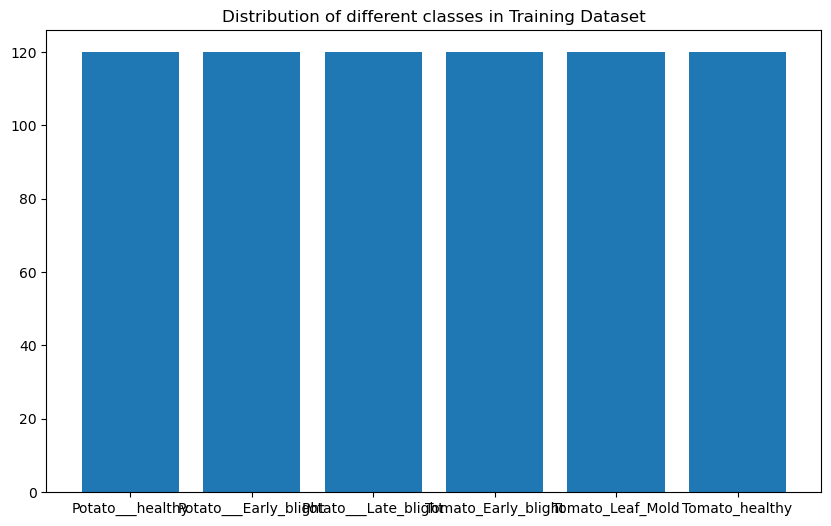

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['Potato___healthy','Potato___Early_blight', 'Potato___Late_blight', 'Tomato_Early_blight', 'Tomato_Leaf_Mold', 'Tomato_healthy']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir("C:/Users/Skhum/OneDrive - Sol Plaatje University/Desktop/New folder/train/"+i+"/"))
    nimgs[i]=nimages
plt.figure(figsize=(10, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [ ]:
for i in ['Potato___healthy' ,'Potato___Early_blight', 'Potato___Late_blight', 'Tomato_Early_blight', 'Tomato_Leaf_Mold','Tomato_healthy']:
    print('Training {} images are: '.format(i)+str(len(os.listdir("C:/Users/Skhum/OneDrive - Sol Plaatje University/Desktop/New folder/train/"+i+"/"))))

Training Potato___healthy images are: 120
Training Potato___Early_blight images are: 120
Training Potato___Late_blight images are: 120
Training Tomato_Early_blight images are: 120
Training Tomato_Leaf_Mold images are: 120
Training Tomato_healthy images are: 120


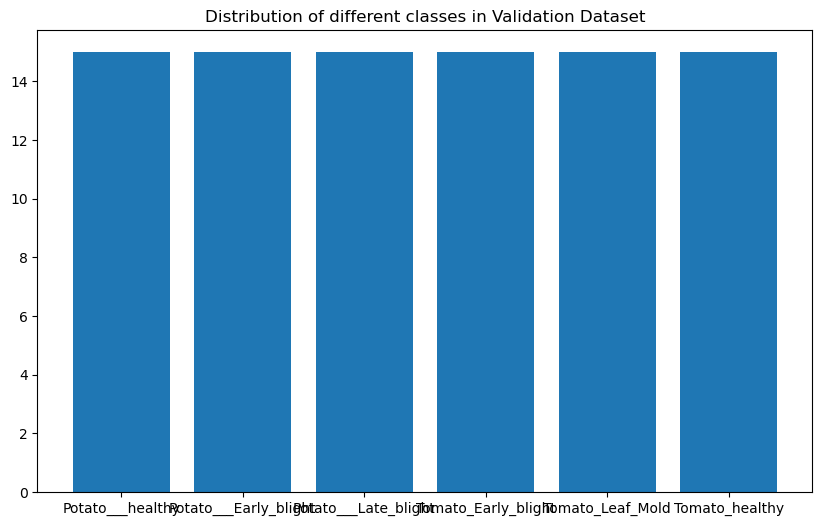

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['Potato___healthy','Potato___Early_blight', 'Potato___Late_blight', 'Tomato_Early_blight', 'Tomato_Leaf_Mold', 'Tomato_healthy']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir("C:/Users/Skhum/OneDrive - Sol Plaatje University/Desktop/New folder/validation/"+i+"/"))
    nimgs[i]=nimages
plt.figure(figsize=(10, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()

In [ ]:
for i in ['Potato___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Tomato_Early_blight', 'Tomato_Leaf_Mold', 'Tomato_healthy']:
    print('Training {} images are: '.format(i)+str(len(os.listdir("C:/Users/Skhum/OneDrive - Sol Plaatje University/Desktop/New folder/validation/"+i+"/"))))

Training Potato___healthy images are: 15
Training Potato___Early_blight images are: 15
Training Potato___Late_blight images are: 15
Training Tomato_Early_blight images are: 15
Training Tomato_Leaf_Mold images are: 15
Training Tomato_healthy images are: 15


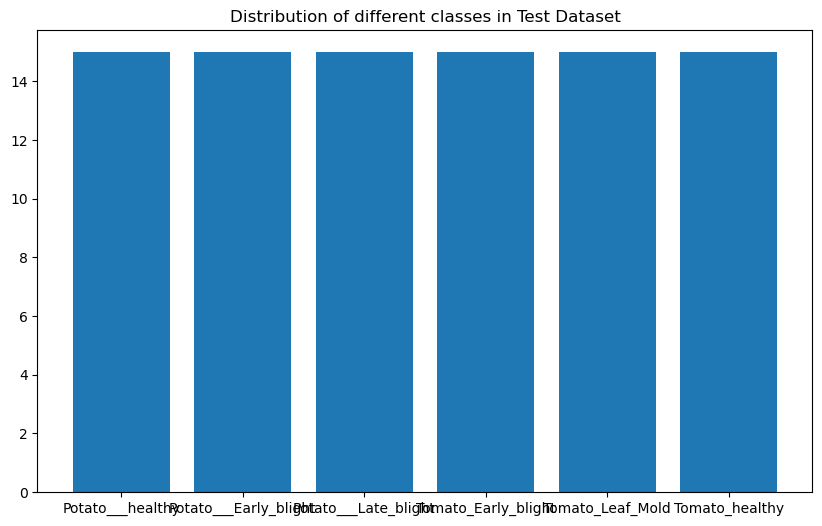

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['Potato___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Tomato_Early_blight', 'Tomato_Leaf_Mold','Tomato_healthy']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir("C:/Users/Skhum/OneDrive - Sol Plaatje University/Desktop/New folder/test/"+i+"/"))
    nimgs[i]=nimages
plt.figure(figsize=(10, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Test Dataset')
plt.show()

In [ ]:
for i in ['Potato___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Tomato_Early_blight', 'Tomato_Leaf_Mold', 'Tomato_healthy']:
    print('Training {} images are: '.format(i)+str(len(os.listdir("C:/Users/Skhum/OneDrive - Sol Plaatje University/Desktop/New folder/test/"+i+"/"))))

Training Potato___healthy images are: 15
Training Potato___Early_blight images are: 15
Training Potato___Late_blight images are: 15
Training Tomato_Early_blight images are: 15
Training Tomato_Leaf_Mold images are: 15
Training Tomato_healthy images are: 15


In [ ]:
#Start of modelling

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from kerastuner.tuners import RandomSearch

img_height, img_width, img_channels = 299, 299, 3
num_classes = 6

batch_size = 16

TRAINING_DIR = "C:/Users/Skhum/OneDrive - Sol Plaatje University/Desktop/New folder/train"
VALIDATION_DIR = "C:/Users/Skhum/OneDrive - Sol Plaatje University/Desktop/New folder/validation"
TEST_DIR = "C:/Users/Skhum/OneDrive - Sol Plaatje University/Desktop/New folder/test"

train_datagen = ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=30,
    zoom_range=0.4,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1/255.0)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=batch_size,
    class_mode='categorical',
    target_size=(img_height, img_width)
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=batch_size,
    class_mode='categorical',
    target_size=(img_height, img_width)
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
best_model_file = "C:/Users/Skhum/OneDrive - Sol Plaatje University/Desktop/CNN_aug_best_weights.h5"
best_model = ModelCheckpoint(best_model_file, monitor='val_accuracy', verbose=1, save_best_only=True)

def build_model(hp):
    base_model = InceptionV3(weights='imagenet', include_top=False, input_tensor=Input(shape=(img_height, img_width, img_channels)))

    for layer in base_model.layers:
        layer.trainable = False

    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)

    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

####################################################################
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    directory='my_tuning_directory',
    project_name='InceptionV3_hyperparameter_tuning'
)

####################################################
tuner.search(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[callbacks, best_model]
)

tuner.results_summary()

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print(best_hps)

final_model = tuner.hypermodel.build(best_hps)
final_model.summary()

history = final_model.fit(
    train_generator,
    epochs=30,
    verbose=1,
    validation_data=validation_generator,
    callbacks=[best_model]
)


Trial 3 Complete [00h 10m 04s]
val_accuracy: 0.8999999761581421

Best val_accuracy So Far: 0.8999999761581421
Total elapsed time: 00h 29m 47s
Results summary
Results in my_tuning_directory\InceptionV3_hyperparameter_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 01 summary
Hyperparameters:
learning_rate: 0.0001
Score: 0.8999999761581421

Trial 02 summary
Hyperparameters:
learning_rate: 0.001
Score: 0.8999999761581421

Trial 00 summary
Hyperparameters:
learning_rate: 0.01
Score: 0.8888888955116272
Best Hyperparameters:
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)      

 gePooling2D)                                                                                     
                                                                                                  
 conv2d_99 (Conv2D)          (None, 35, 35, 64)           12288     ['max_pooling2d_5[0][0]']     
                                                                                                  
 conv2d_101 (Conv2D)         (None, 35, 35, 64)           76800     ['activation_100[0][0]']      
                                                                                                  
 conv2d_104 (Conv2D)         (None, 35, 35, 96)           82944     ['activation_103[0][0]']      
                                                                                                  
 conv2d_105 (Conv2D)         (None, 35, 35, 32)           6144      ['average_pooling2d_9[0][0]'] 
                                                                                                  
 batch_nor

 batch_normalization_112 (B  (None, 35, 35, 64)           192       ['conv2d_112[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_106 (Activation  (None, 35, 35, 64)           0         ['batch_normalization_106[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_108 (Activation  (None, 35, 35, 64)           0         ['batch_normalization_108[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_111 (Activation  (None, 35, 35, 96)           0         ['batch_normalization_111[0][0
 )        

                                                                                                  
 conv2d_121 (Conv2D)         (None, 35, 35, 64)           18432     ['mixed2[0][0]']              
                                                                                                  
 batch_normalization_121 (B  (None, 35, 35, 64)           192       ['conv2d_121[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_121 (Activation  (None, 35, 35, 64)           0         ['batch_normalization_121[0][0
 )                                                                  ]']                           
                                                                                                  
 conv2d_122 (Conv2D)         (None, 35, 35, 96)           55296     ['activation_121[0][0]']      
          

 )                                                                  ]']                           
                                                                                                  
 activation_131 (Activation  (None, 17, 17, 128)          0         ['batch_normalization_131[0][0
 )                                                                  ]']                           
                                                                                                  
 average_pooling2d_12 (Aver  (None, 17, 17, 768)          0         ['mixed3[0][0]']              
 agePooling2D)                                                                                    
                                                                                                  
 conv2d_124 (Conv2D)         (None, 17, 17, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_12

                                                                                                  
 batch_normalization_141 (B  (None, 17, 17, 160)          480       ['conv2d_141[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_136 (Activation  (None, 17, 17, 160)          0         ['batch_normalization_136[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_141 (Activation  (None, 17, 17, 160)          0         ['batch_normalization_141[0][0
 )                                                                  ]']                           
                                                                                                  
 average_p

                                                                                                  
 conv2d_151 (Conv2D)         (None, 17, 17, 160)          179200    ['activation_150[0][0]']      
                                                                                                  
 batch_normalization_146 (B  (None, 17, 17, 160)          480       ['conv2d_146[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 batch_normalization_151 (B  (None, 17, 17, 160)          480       ['conv2d_151[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_146 (Activation  (None, 17, 17, 160)          0         ['batch_normalization_146[0][0
 )        

                                                                                                  
 activation_160 (Activation  (None, 17, 17, 192)          0         ['batch_normalization_160[0][0
 )                                                                  ]']                           
                                                                                                  
 conv2d_156 (Conv2D)         (None, 17, 17, 192)          258048    ['activation_155[0][0]']      
                                                                                                  
 conv2d_161 (Conv2D)         (None, 17, 17, 192)          258048    ['activation_160[0][0]']      
                                                                                                  
 batch_normalization_156 (B  (None, 17, 17, 192)          576       ['conv2d_156[0][0]']          
 atchNormalization)                                                                               
          

 batch_normalization_168 (B  (None, 17, 17, 192)          576       ['conv2d_168[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_164 (Activation  (None, 17, 17, 192)          0         ['batch_normalization_164[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_168 (Activation  (None, 17, 17, 192)          0         ['batch_normalization_168[0][0
 )                                                                  ]']                           
                                                                                                  
 conv2d_165 (Conv2D)         (None, 8, 8, 320)            552960    ['activation_164[0][0]']      
          

 batch_normalization_170 (B  (None, 8, 8, 320)            960       ['conv2d_170[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_172 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_172[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_173 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_173[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_176 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_176[0][0
 )        

                                                                                                  
 conv2d_187 (Conv2D)         (None, 8, 8, 192)            393216    ['average_pooling2d_17[0][0]']
                                                                                                  
 batch_normalization_179 (B  (None, 8, 8, 320)            960       ['conv2d_179[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_181 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_181[0][0
 )                                                                  ]']                           
                                                                                                  
 activation_182 (Activation  (None, 8, 8, 384)            0         ['batch_normalization_182[0][0
 )        

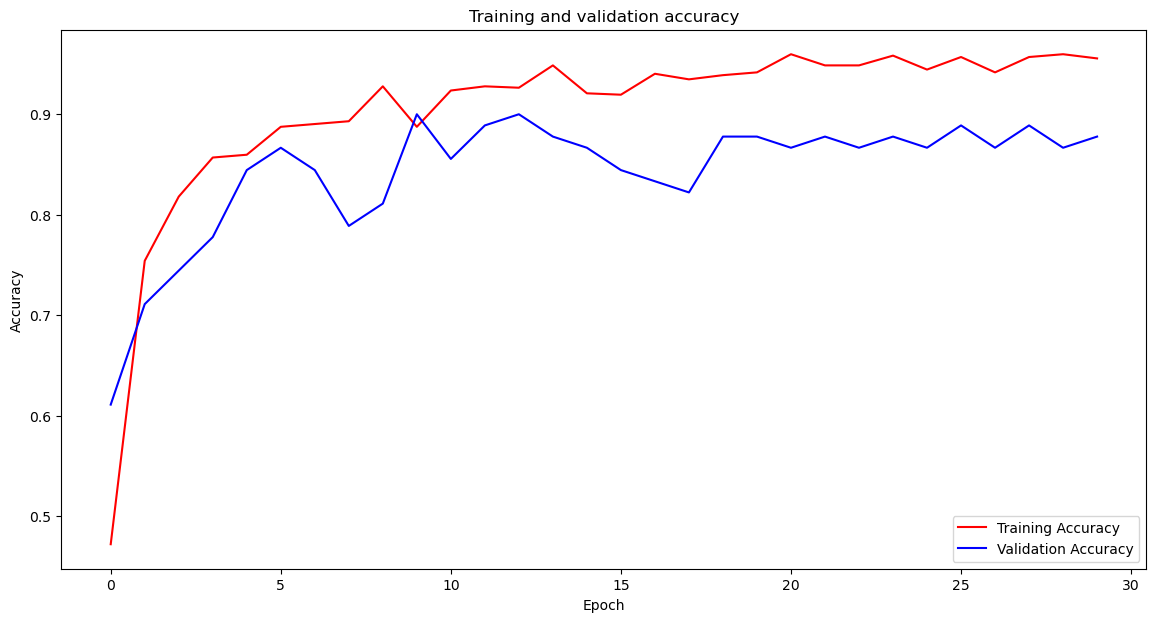

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

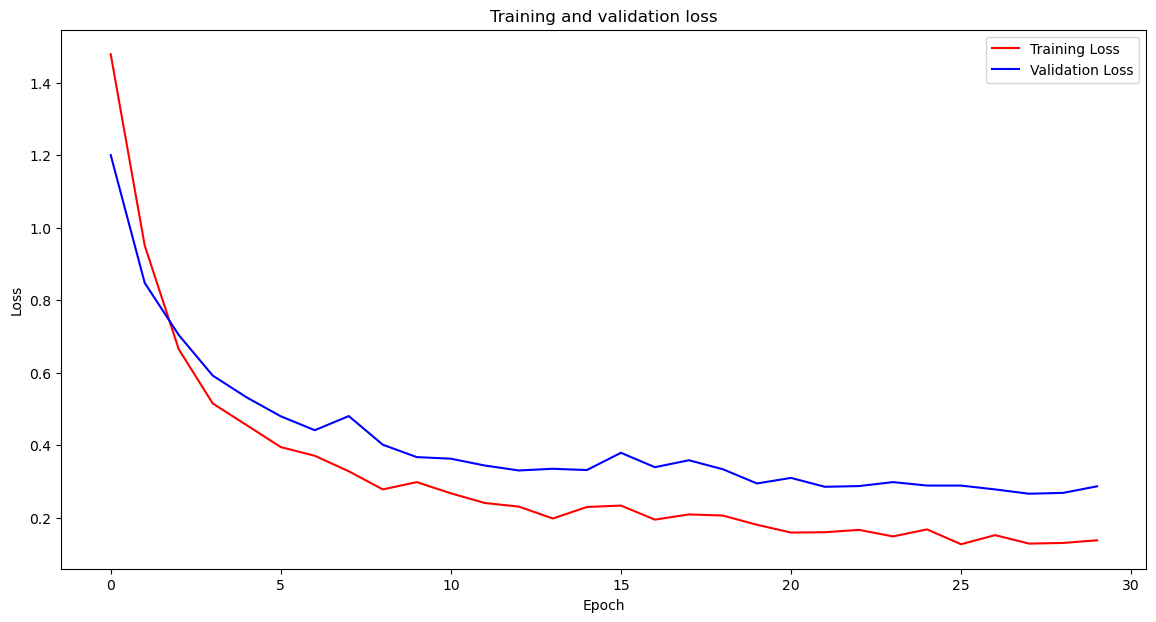

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from keras.callbacks import Callback


class MetricsCallback(Callback):
    def __init__(self, validation_data):
        super(MetricsCallback, self).__init__()
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        val_predict = np.round(self.model.predict(self.validation_data[0]))
        val_true = self.validation_data[1]
        auc = roc_auc_score(val_true, val_predict)
        accuracy = accuracy_score(val_true, val_predict)
        cm = confusion_matrix(val_true.argmax(axis=1), val_predict.argmax(axis=1))
        f1 = f1_score(val_true.argmax(axis=1), val_predict.argmax(axis=1), average='weighted')

        print(f" - AUC: {auc:.4f} - Accuracy: {accuracy:.4f} - F1-Score: {f1:.4f}")
        print("Confusion Matrix:")
        print(cm)


6/6 [==============================] - 9s 1s/step


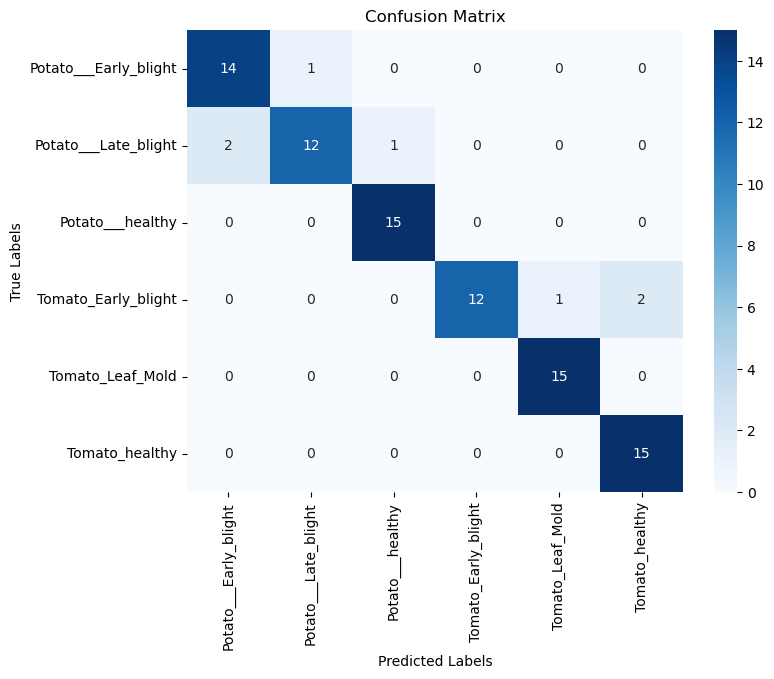

                       precision    recall  f1-score   support

Potato___Early_blight       0.88      0.93      0.90        15
 Potato___Late_blight       0.92      0.80      0.86        15
     Potato___healthy       0.94      1.00      0.97        15
  Tomato_Early_blight       1.00      0.80      0.89        15
     Tomato_Leaf_Mold       0.94      1.00      0.97        15
       Tomato_healthy       0.88      1.00      0.94        15

             accuracy                           0.92        90
            macro avg       0.93      0.92      0.92        90
         weighted avg       0.93      0.92      0.92        90



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

test_steps = len(test_generator)
y_pred = final_model.predict(test_generator, steps=test_steps)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = test_generator.classes

confusion_mtx = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

class_labels = list(test_generator.class_indices.keys())
classification_rep = classification_report(y_true, y_pred_classes, target_names=class_labels)
print(classification_rep)


6/6 [==============================] - 6s 1s/step


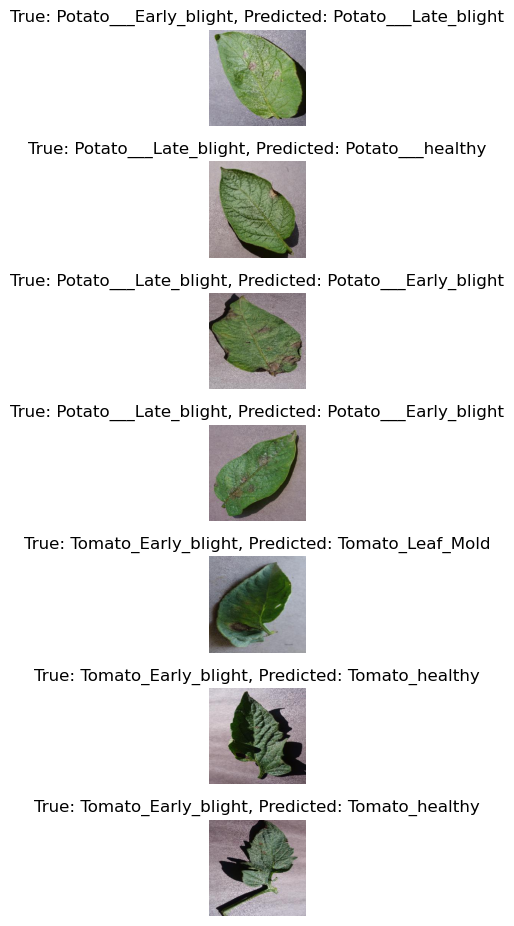

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

test_filenames = test_generator.filenames

test_steps = len(test_generator)
y_pred = final_model.predict(test_generator, steps=test_steps)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = test_generator.classes

misclassified_indices = np.where(y_true != y_pred_classes)[0]

max_display = 9
plt.figure(figsize=(6, 12))
misclassified_count = 0

test_image_dir = "C:/Users/Skhum/OneDrive - Sol Plaatje University/Desktop/New folder/test"

class_labels = {v: k for k, v in test_generator.class_indices.items()}

for i, index in enumerate(misclassified_indices):
    if misclassified_count >= max_display:
        break

    true_class = y_true[index]
    predicted_class = y_pred_classes[index]

    filename = os.path.join(test_image_dir, test_filenames[index])

    img = image.load_img(filename, target_size=(256, 256))
    plt.subplot(max_display, 1, misclassified_count + 1)
    plt.imshow(img)

    true_label = class_labels[true_class]
    predicted_label = class_labels[predicted_class]

    plt.title(f'True: {true_label}, Predicted: {predicted_label}')
    plt.axis('off')
    misclassified_count += 1

plt.tight_layout()
plt.show()
